In [2]:
#Polynomial Regression without scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat
from scipy.optimize import minimize

In [3]:
#getting the data
data=loadmat('Data/LinearReg2.mat')
#gets loaded in form of a dictionary
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [5]:
#getting the training set
X_train=np.array(data['X'])
y_train=np.array(data['y'])
#adding the bias term in the front
X_train  = np.hstack((np.ones_like(y_train), X_train))
#getting the test set
y_test = data['ytest']
#adding the bias term in the front
X_test = np.c_[np.ones_like(data['Xtest']), data['Xtest']]
#getting the cross validation set
y_val = data['yval']
#adding the bias term in the front
X_val = np.c_[np.ones_like(data['Xval']), data['Xval']]
#the dimensions of the sets
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(12, 2)
(12, 1)
(21, 2)
(21, 1)
(21, 2)
(21, 1)


Text(0,0.5,'water flowing out of the dam')

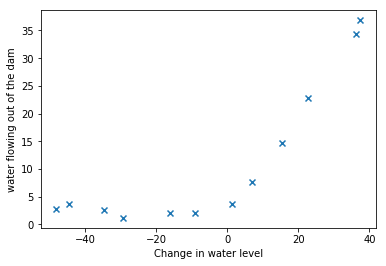

In [4]:
#lets plot our data
plt.scatter(X_train[:,1],y_train,marker='x')
plt.xlabel('Change in water level')
plt.ylabel('water flowing out of the dam')

As we can see a simple linear fit on the data wouldnt be quite generalized solution for a linear regression model and thus we need polynomial regression to handle such curvilinear datasets

In [5]:
#regularized cost function
def cost(theta,X,y,reg):
    m=len(y)
    theta = theta[:,None]
    #calculating cost
    J=((np.sum((np.dot(X,theta) - y)**2))/(2*m) + (reg/(2*m))*np.sum(theta**2))
    #calculating gradient
    gradients = ((np.sum((np.dot(X,theta)-y)*X,axis=0)/m)+(reg/m)*theta.T)
    # Replace gradient for theta_0 with non-regularized
    gradients[0] = gradients[0] - (reg/m)*theta.T
    gradients = gradients.flatten()
    return (J,gradients)

In [6]:
def trainLinearReg(X, y,reg):
    initial_theta = np.zeros(np.size(X,1))      
    res = minimize(cost,initial_theta,args=(X,y,reg),jac=True,options={'maxiter':1000,'disp':True})
    return(res)

The function maps the original training set X of size into its higher powers. Specifically, when a training set  of size  is passed into the function, the function should return a  matrix X_poly, where column 1 holds the original values of X, column 2 holds the values of X.^2, column 3 holds the values of X.^3, and so on. Note that you don't have to account for the zero-th power in this function. 

In [7]:
def polyFeatures(X,p):
    X_poly = np.zeros((len(X),p))
    X = X.flatten()
    for i in range(1,p+1):
        X_poly[:,i-1] = X**i
    return X_poly

In [8]:
def featureNormalize(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    normalized_X = np.divide(X - mu,sigma)
    return (normalized_X, mu, sigma)

In [9]:
# Feature Mapping for Polynomial Regression
p = 8
X_poly = polyFeatures(X_train[:,1],p)
X_poly, mu, sigma = featureNormalize(X_poly)
#adding bias term
X_poly = np.hstack((np.ones_like(y_train),X_poly))

In [10]:
X_poly_test = polyFeatures(X_test[:,1],p)
X_poly_test = np.divide(X_poly_test - mu, sigma)
#adding bias term
X_poly_test = np.hstack((np.ones_like(y_test),X_poly_test))

In [11]:
X_poly_val = polyFeatures(X_val[:,1],p)
X_poly_val = np.divide(X_poly_val - mu, sigma)
#adding bias term
X_poly_val = np.hstack((np.ones_like(y_val),X_poly_val))

In [12]:
def plotFit(min_x, max_x, mu, sigma, theta, p):
    x = np.arange(min_x - 15, max_x + 25, 0.05).reshape((-1,1))
    X_poly = polyFeatures(x,p)
    X_poly = np.divide(X_poly - mu, sigma)
    X_poly = np.hstack((np.ones(len(X_poly)).reshape((-1,1)),X_poly))
    plt.plot(x,np.dot(X_poly,theta),'b--',linewidth=2)
    return

         Current function value: 12.629773
         Iterations: 6
         Function evaluations: 106
         Gradient evaluations: 94


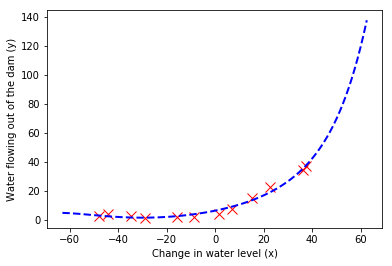

In [13]:
#Learning for Polynomial Regression
reg_param = 1.0
est_theta = trainLinearReg(X_poly,y_train,reg_param)
plt.plot(X_train[:,1], y_train, 'rx', markersize=10, linewidth=1.5)
plotFit(np.min(X_train), np.max(X_train), mu, sigma, est_theta.x, p)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

In [14]:
#learning Curve
def learningCurve(X, y, Xval, yval, reg):
    m_train = len(X)
    m_val = len(X)
    error_train = np.zeros(m_train)
    error_val = np.zeros(m_val)
    for i in range(1,m_train+1):
        res =trainLinearReg(X[:i],y[:i], reg)
        error_train[i-1] = (np.sum((np.dot(X[:i],res.x)-y[:i])**2))/(2.0*i)
        error_val[i-1] =(np.sum((np.dot(Xval,res.x)-yval)**2))/(2.0*m_val)
        #print(i,"\t",error_train[i-1],"\t",error_val[i-1])
    
    return(error_train, error_val)

In [15]:
error_train, error_val=  learningCurve(X_poly, y_train, X_poly_val, y_val, 0.0)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 36
         Function evaluations: 37
         Gr

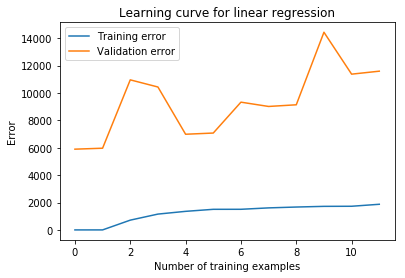

In [16]:
plt.plot(range(len(X_train)),error_train, label='Training error')
plt.plot(range(len(X_train)), error_val, label='Validation error')
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend();

In [17]:
#validation curve
def validationCurve(X, y, Xval, yval):
    lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]).reshape((-1,1))
    error_train = np.zeros(len(lambda_vec))
    error_val = np.zeros(len(lambda_vec))

    for i in range(len(lambda_vec)):
        m_train = len(X)
        m_val = len(Xval)
        reg_param = lambda_vec[i]
        est_theta = trainLinearReg(X,y,reg_param)
        error_train[i] = (np.sum((np.dot(X,est_theta.x)-y)**2))/(2.0*m_train)
        error_val[i] = (np.sum((np.dot(Xval,est_theta.x)-yval)**2))/(2.0*m_val)

    return (lambda_vec, error_train, error_val)

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.381049
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.395335
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.445335
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.588192
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 23.088192
         Iterations: 3
         Function evaluations: 5
         Grad

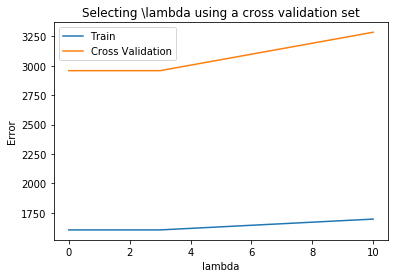

In [18]:
# Validation for selecting lambda
lambda_vec, error_train, error_val = validationCurve(X_train,y_train,X_val,y_val)
plt.plot(lambda_vec, error_train, lambda_vec, error_val);
plt.title('Selecting \lambda using a cross validation set')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('lambda')
plt.ylabel('Error')
plt.show()

In [19]:
#Polynomial Regression with scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
dataset = pd.read_csv('Data/soda.csv')
dataset.head()

,temperature,units_sold
0,44.0,2600.0
1,96.0,12126.0
2,96.0,12107.0
3,36.0,1639.0
4,42.0,2400.0


In [20]:
dataset.describe()

,temperature,units_sold
count,50.000000,50.000000
mean,62.720000,5699.840000
std,20.945059,3619.349493
min,30.000000,1042.000000
25%,44.000000,3037.500000
50%,60.500000,4992.000000
75%,77.000000,7503.500000
max,99.000000,13194.000000


Text(0,0.5,'soda units sold')

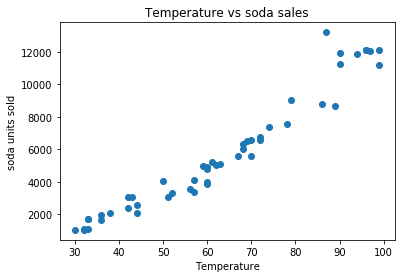

In [21]:
# scatter plot
plt.scatter(dataset.temperature,dataset.units_sold);
plt.title('Temperature vs soda sales')
plt.xlabel('Temperature')
plt.ylabel('soda units sold')

In [23]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(35, 1)
(35,)
(15, 1)
(15,)


In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [37]:
from sklearn.linear_model import LinearRegression
reg =LinearRegression()
reg.fit(X_train_poly,y_train)
y_pred=reg.predict(X_test_poly)

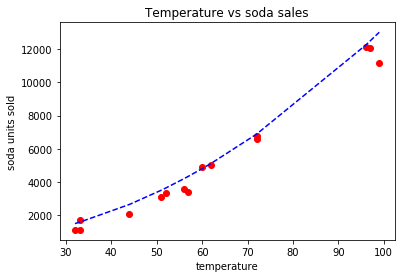

In [39]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(sorted(X_test), sorted(y_pred), '--',color = 'blue')
plt.title('Temperature vs soda sales')
plt.xlabel('temperature')
plt.ylabel('soda units sold')
plt.show()

In [40]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
ex_var_score = explained_variance_score(y_test, y_pred)
m_absolute_error = mean_absolute_error(y_test, y_pred)
m_squared_error = mean_squared_error(y_test, y_pred)
r_2_score = r2_score(y_test, y_pred)

print("Explained Variance Score: "+str(ex_var_score))
print("Mean Absolute Error "+str(m_absolute_error))
print("Mean Squared Error "+str(m_squared_error))
print("R Squared Score "+str(r_2_score))

Explained Variance Score: 0.9837831082967924
Mean Absolute Error 459.44691210976777
Mean Squared Error 404692.40065094153
R Squared Score 0.9703691024827246


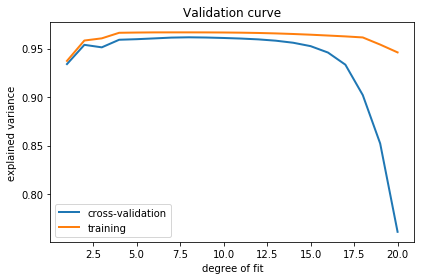

In [43]:
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
degrees = np.arange(1, 21)

model = make_pipeline(PolynomialFeatures(), LinearRegression())

# The parameter to vary is the "degrees" on the pipeline step
# "polynomialfeatures"
train_scores, validation_scores = validation_curve(
                 model, X, y,
                 param_name='polynomialfeatures__degree',
                 param_range=degrees)

# Plot the mean train error and validation error across folds
plt.figure(figsize=(6, 4))
plt.plot(degrees, validation_scores.mean(axis=1), lw=2,
         label='cross-validation')
plt.plot(degrees, train_scores.mean(axis=1), lw=2, label='training')

plt.legend(loc='best')
plt.xlabel('degree of fit')
plt.ylabel('explained variance')
plt.title('Validation curve')
plt.tight_layout()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1192: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 17 instead of 20).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1192: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 17 instead of 20).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1192: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 17 instead of 20).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


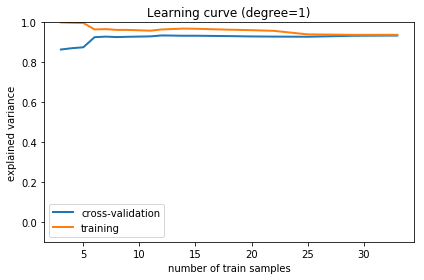

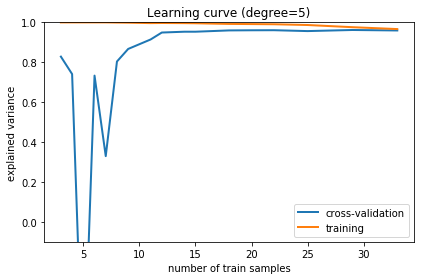

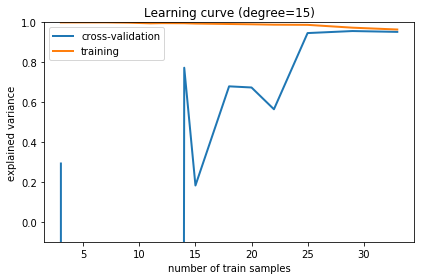

In [44]:
# A learning curve for d=1, 5, 15
for d in [1, 5, 15]:
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())

    from sklearn.model_selection import learning_curve
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y,
        train_sizes=np.logspace(-1, 0, 20))

    # Plot the mean train error and validation error across folds
    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, validation_scores.mean(axis=1),
            lw=2, label='cross-validation')
    plt.plot(train_sizes, train_scores.mean(axis=1),
                lw=2, label='training')
    plt.ylim(ymin=-.1, ymax=1)

    plt.legend(loc='best')
    plt.xlabel('number of train samples')
    plt.ylabel('explained variance')
    plt.title('Learning curve (degree=%i)' % d)
    plt.tight_layout()


plt.show()